In [1]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Постановка
1) ЗП per hour  
2) Опыт работы   
3) education years  
4) Привлекательность  
5) бинарные признаки
Влияние привлекательности на ЗП  

In [13]:
raw = pd.read_csv("./data/beauty.csv", sep=";", index_col=False)

In [14]:
raw.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


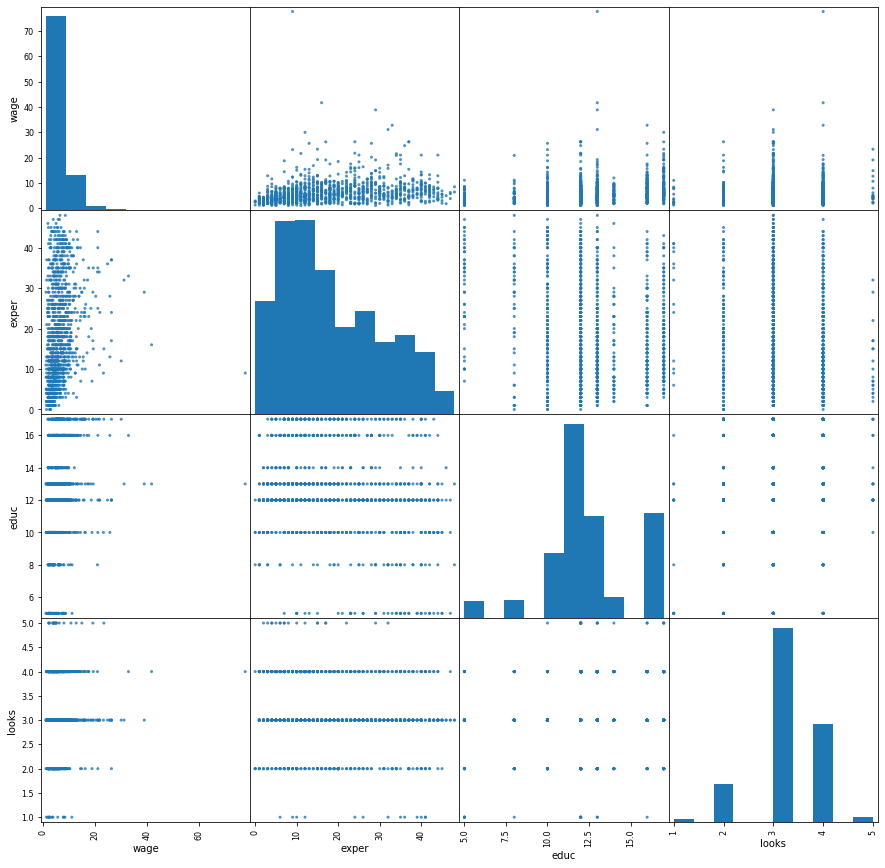

In [19]:
pd.plotting.scatter_matrix(raw[["wage", "exper", "educ", "looks"]], alpha=.8, figsize=(15, 15), diagonal="hist");

In [20]:
print(raw.union.value_counts())
print(raw.goodhlth.value_counts())
print(raw.black.value_counts())
print(raw.female.value_counts())
print(raw.married.value_counts())
print(raw.service.value_counts())

0    917
1    343
Name: union, dtype: int64
1    1176
0      84
Name: goodhlth, dtype: int64
0    1167
1      93
Name: black, dtype: int64
0    824
1    436
Name: female, dtype: int64
1    871
0    389
Name: married, dtype: int64
0    915
1    345
Name: service, dtype: int64


### Предобработка

In [21]:
data = raw

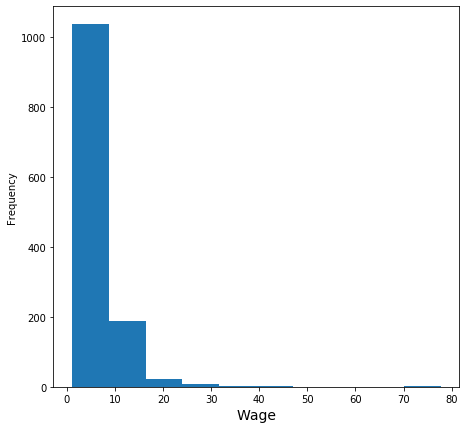

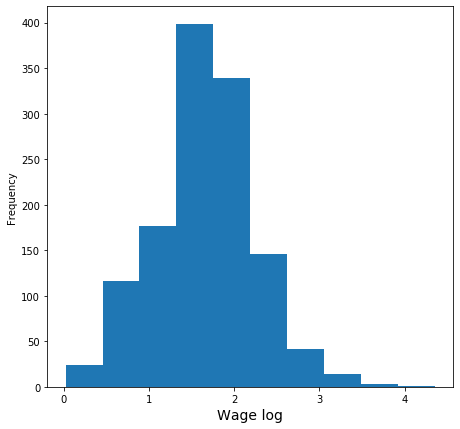

In [33]:
plt.figure(figsize(16, 7))
plt.subplot(1, 2, 1)
data["wage"].plot(kind="hist")
plt.xlabel("Wage", fontsize=14)
plt.figure(figsize(16, 7))

plt.subplot(1, 2, 2)
np.log(data["wage"]).plot(kind="hist")
plt.xlabel("Wage log", fontsize=14);